In [4]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [48]:
p = 0.108

In [49]:
for L in tqdm([8, 16, 32, 64, 128, 256, 512]):
    merged_dict = Counter()
    number_of_averages = 4096 // L
    lattice = Lattice2D(L, pflip=p)
    filename = f'{lattice.lrgsgpath}p={p:.3g}_na={number_of_averages}.pickle'
    if os.path.exists(filename):
        continue
    for avg in range(number_of_averages):
        lattice.flip_random_fract_edges()
        dist_dict = lattice.cluster_distribution_list()
        merged_dict += Counter(dist_dict)
        lattice.unflip_all()
        delattr(lattice, "eigV")


    with open(filename, 'wb') as file:
        pickle.dump(list(merged_dict.values()), file)

100%|██████████| 7/7 [20:29<00:00, 175.58s/it]


In [50]:
side = 512
fpath = f"data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={4096//side}.pickle"

In [51]:
side = 512
fpath = f"data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={4096//side}.pickle"
with open(fpath, 'rb') as file:
    prova = pickle.load(file)

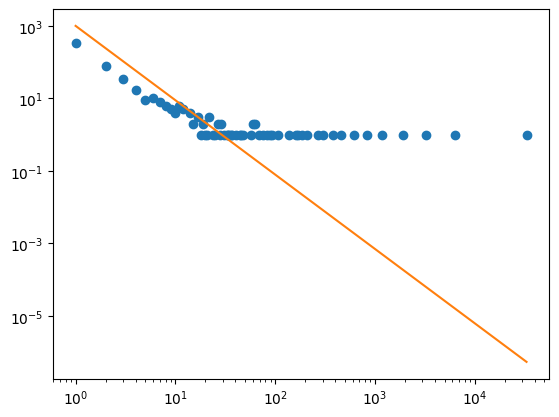

In [53]:
hist, bin_edges = np.histogram(prova, bins=100000)
plt.plot(bin_edges[:-1], hist, 'o')
plt.plot(bin_edges[:-1], 1000*(bin_edges[:-1])**(-2.05))

plt.xscale('log')
plt.yscale('log')

In [55]:
binc, hist, bw = log_binning(prova, 20)

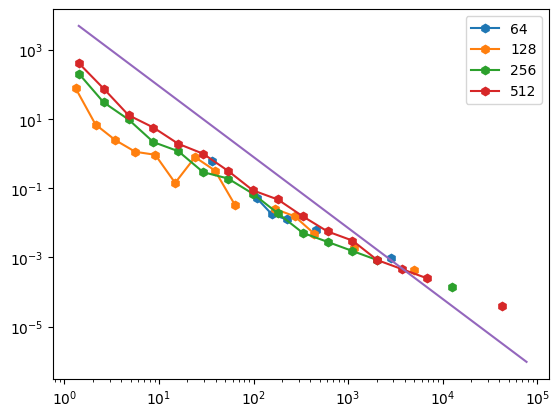

In [86]:
for side in [64, 128, 256, 512]:
    fpath = f"data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={4096//side}.pickle"
    with open(fpath, 'rb') as file:
        prova = pickle.load(file)
    binc, hist, bw = log_binning(prova, 20)
    hist1 = hist/bw
    np.where(hist1==0., np.inf, hist1)
    plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
plt.plot(binc, 10000*(1.0*np.array(binc))**(-2.05))

#
plt.legend()
plt.xscale('log')
plt.yscale('log')

1000 medie, up to 1024, progressive save

In [83]:
1/(512**2/30000)

0.11444091796875